# Dynamic Markov Compression

#### Importing necessary libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys

In [2]:
sns.set()

In [3]:
from Bio import SeqIO

In [4]:
np.set_printoptions(threshold=sys.maxsize)

#### Showing contents of the FASTA file

In [5]:
!cat data/dengue.fasta

>NC_001477.1 Dengue virus 1, complete genome
AGTTGTTAGTCTACGTGGACCGACAAGAACAGTTTCGAATCGGAAGCTTGCTTAACGTAGTTCTAACAGT
TTTTTATTAGAGAGCAGATCTCTGATGAACAACCAACGGAAAAAGACGGGTCGACCGTCTTTCAATATGC
TGAAACGCGCGAGAAACCGCGTGTCAACTGTTTCACAGTTGGCGAAGAGATTCTCAAAAGGATTGCTTTC
AGGCCAAGGACCCATGAAATTGGTGATGGCTTTTATAGCATTCCTAAGATTTCTAGCCATACCTCCAACA
GCAGGAATTTTGGCTAGATGGGGCTCATTCAAGAAGAATGGAGCGATCAAAGTGTTACGGGGTTTCAAGA
AAGAAATCTCAAACATGTTGAACATAATGAACAGGAGGAAAAGATCTGTGACCATGCTCCTCATGCTGCT
GCCCACAGCCCTGGCGTTCCATCTGACCACCCGAGGGGGAGAGCCGCACATGATAGTTAGCAAGCAGGAA
AGAGGAAAATCACTTTTGTTTAAGACCTCTGCAGGTGTCAACATGTGCACCCTTATTGCAATGGATTTGG
GAGAGTTATGTGAGGACACAATGACCTACAAATGCCCCCGGATCACTGAGACGGAACCAGATGACGTTGA
CTGTTGGTGCAATGCCACGGAGACATGGGTGACCTATGGAACATGTTCTCAAACTGGTGAACACCGACGA
GACAAACGTTCCGTCGCACTGGCACCACACGTAGGGCTTGGTCTAGAAACAAGAACCGAAACGTGGATGT
CCTCTGAAGGCGCTTGGAAACAAATACAAAAAGTGGAGACCTGGGCTCTGAGACACCCAGGATTCACGGT
GATAGCCCTTTTTCTAGCACATGCCATAGGAACATCCATCACCCAGAAAGGGATCATTTTTATTTTGCTG
ATGCTGGTAACTCCATCCATGGCCATGCGGTG

#### Extracting string from FASTA file 

In [6]:
file = 'data/dengue.fasta'

In [7]:
fasta_sequences = SeqIO.parse(open(file),'fasta')
seq = [str(fasta.seq) for fasta in fasta_sequences]

In [8]:
seq_str = ''
for s in seq:
    seq_str += s
    
seq_str

'AGTTGTTAGTCTACGTGGACCGACAAGAACAGTTTCGAATCGGAAGCTTGCTTAACGTAGTTCTAACAGTTTTTTATTAGAGAGCAGATCTCTGATGAACAACCAACGGAAAAAGACGGGTCGACCGTCTTTCAATATGCTGAAACGCGCGAGAAACCGCGTGTCAACTGTTTCACAGTTGGCGAAGAGATTCTCAAAAGGATTGCTTTCAGGCCAAGGACCCATGAAATTGGTGATGGCTTTTATAGCATTCCTAAGATTTCTAGCCATACCTCCAACAGCAGGAATTTTGGCTAGATGGGGCTCATTCAAGAAGAATGGAGCGATCAAAGTGTTACGGGGTTTCAAGAAAGAAATCTCAAACATGTTGAACATAATGAACAGGAGGAAAAGATCTGTGACCATGCTCCTCATGCTGCTGCCCACAGCCCTGGCGTTCCATCTGACCACCCGAGGGGGAGAGCCGCACATGATAGTTAGCAAGCAGGAAAGAGGAAAATCACTTTTGTTTAAGACCTCTGCAGGTGTCAACATGTGCACCCTTATTGCAATGGATTTGGGAGAGTTATGTGAGGACACAATGACCTACAAATGCCCCCGGATCACTGAGACGGAACCAGATGACGTTGACTGTTGGTGCAATGCCACGGAGACATGGGTGACCTATGGAACATGTTCTCAAACTGGTGAACACCGACGAGACAAACGTTCCGTCGCACTGGCACCACACGTAGGGCTTGGTCTAGAAACAAGAACCGAAACGTGGATGTCCTCTGAAGGCGCTTGGAAACAAATACAAAAAGTGGAGACCTGGGCTCTGAGACACCCAGGATTCACGGTGATAGCCCTTTTTCTAGCACATGCCATAGGAACATCCATCACCCAGAAAGGGATCATTTTTATTTTGCTGATGCTGGTAACTCCATCCATGGCCATGCGGTGCGTGGGAATAGGCAACAGAGACTTCGTGGAAGGACTGTCAGGAGCTACGTGGGTGGA

In [9]:
len(seq_str)

10735

The string has **10735 characters**

In [10]:
# size in bytes
str_size_b = sys.getsizeof(seq_str)

# size in megabytes
str_size_mb = str_size_b / 1024

str_size_mb

10.53125

The string takes up **10.53 MB** in disk

In [11]:
print(set(seq_str))

# number of unique characters
print(len(set(seq_str)))

{'G', 'A', 'T', 'C'}
4


There are **4** unique characters in the string

#### Counting the frequency of characters in the string

In [12]:
from collections import Counter 

# using collections.Counter() to get count
char_count = Counter(seq_str) 
  
print(char_count)

Counter({'A': 3426, 'G': 2770, 'T': 2299, 'C': 2240})


In [13]:
char_count.most_common()

[('A', 3426), ('G', 2770), ('T', 2299), ('C', 2240)]

[Text(0.5, 0, 'Nucleobases'),
 Text(0.5, 1.0, 'Frequencies of nucleobases in the sequence string')]

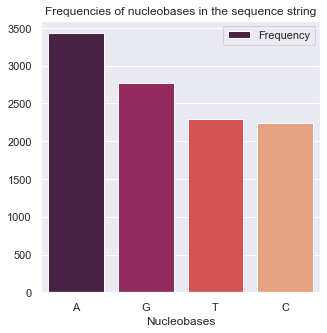

In [14]:
labels, values = zip(*char_count.items())

f,ax = plt.subplots(figsize=(5, 5))
sns.barplot(x=list(labels), y=values, label="Frequency", palette="rocket")
ax.legend(ncol=1, loc="upper right", frameon=True)
ax.set(xlabel="Nucleobases", title="Frequencies of nucleobases in the sequence string")

#### Converting the string literals to integers for `HOMarkov` library

In [15]:
# dictionary for replacting ACGT with integers
seq_dict = {
    'A' : 0,
    'C' : 1,
    'G' : 2,
    'T' : 3
}

In [16]:
seq_int_arr = []

for c in seq_str:
    seq_int_arr.append(seq_dict[c])
    
print(list(seq_str[-10:]))
print(seq_int_arr[-10:])

['A', 'A', 'C', 'A', 'G', 'G', 'T', 'T', 'C', 'T']
[0, 0, 1, 0, 2, 2, 3, 3, 1, 3]


#### Importing `HOMarkov` library

In [17]:
# using Higher Order Markov (HOMarkov) library
from library.HOMarkov import markov

#### Setting the value of k

In [18]:
k = 2
n = len(set(seq_int_arr))

In [19]:
mc = markov.MarkovChain(n, k)

In [20]:
mc.fit(seq_int_arr)

#### Transition matrix for *k-th order markov chain*

In [21]:
mc.transition_matrix.todense()

matrix([[0.12725632, 0.07761733, 0.07851986, 0.066787  , 0.09566787,
         0.05415162, 0.02617329, 0.03790614, 0.10469314, 0.04241877,
         0.06588448, 0.03971119, 0.0433213 , 0.03158845, 0.07851986,
         0.02978339],
        [0.13055556, 0.08194444, 0.09861111, 0.09722222, 0.11111111,
         0.05277778, 0.02222222, 0.05833333, 0.02638889, 0.02638889,
         0.03055556, 0.04722222, 0.04027778, 0.04722222, 0.08055556,
         0.04861111],
        [0.12808989, 0.07865169, 0.10449438, 0.06404494, 0.07191011,
         0.05280899, 0.0247191 , 0.05730337, 0.13033708, 0.04382022,
         0.0494382 , 0.04269663, 0.01573034, 0.03483146, 0.05505618,
         0.04606742],
        [0.04096045, 0.03672316, 0.06920904, 0.05225989, 0.0819209 ,
         0.04237288, 0.01694915, 0.05225989, 0.11016949, 0.06920904,
         0.16666667, 0.06638418, 0.03531073, 0.04519774, 0.06638418,
         0.0480226 ],
        [0.09655938, 0.06659267, 0.07436182, 0.0654828 , 0.0854606 ,
         0.0521

#### Creating labels of the heatmap using cartesian product

In [22]:
from itertools import product
labels = [''.join(p) for p in product(seq_dict.keys(), repeat=k)]

#### Heatmap of the transition matrix

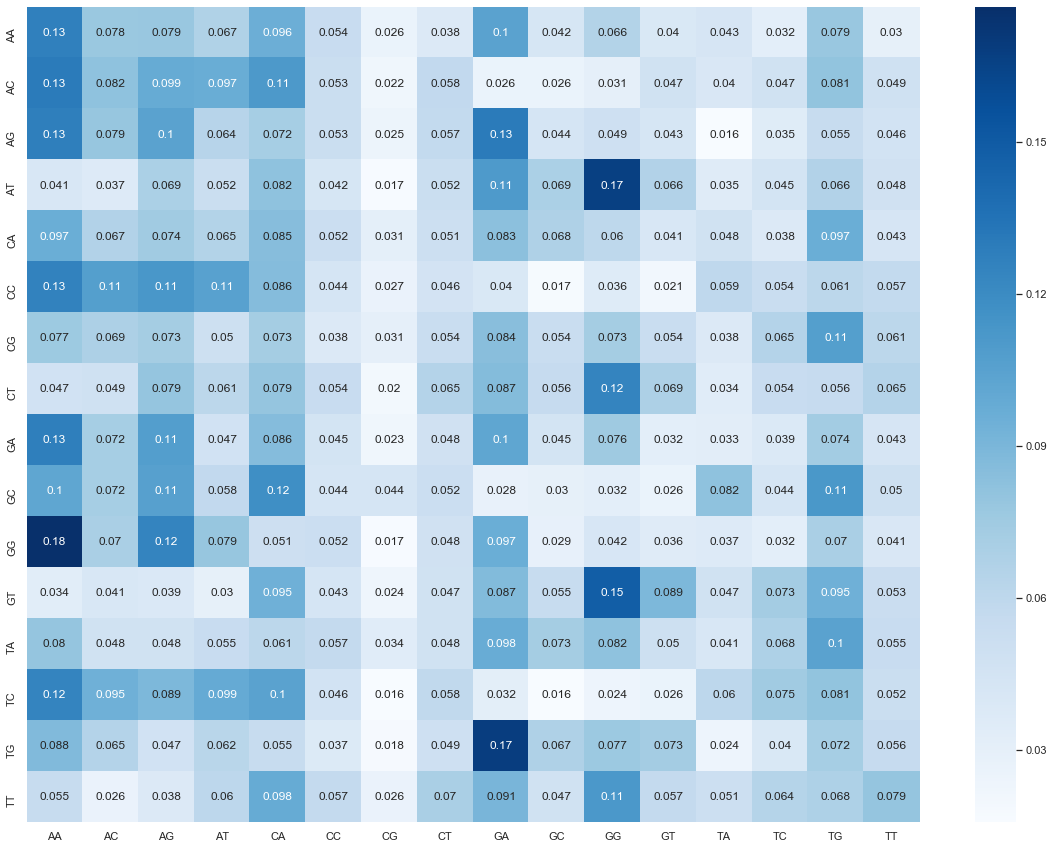

In [23]:
f, ax = plt.subplots(figsize=(10*k, 7.5*k))
sns.heatmap(mc.transition_matrix.todense(), cmap='Blues', annot=True, xticklabels=labels, yticklabels=labels, ax=ax)
# plt.savefig('./images/markov-heatmap.png')

#### Code used for dynamic Markov compression

In [24]:
!cat library/dmc.c

/*   Dynamic Markov Compression (DMC)    Version 0.0.0
 
 
     Copyright 1993, 1987
 
     Gordon V. Cormack
     University of Waterloo
     cormack@uwaterloo.ca
 
 
     All rights reserved.
 
     This code and the algorithms herein are the property of Gordon V. Cormack.
 
     Neither the code nor any algorithm herein may be included in any software,
     device, or process which is sold, exchanged for profit, or for which a
     licence or royalty fee is charged.
 
     Permission is granted to use this code for educational, research, or
     commercial purposes, provided this notice is included, and provided this
     code is not used as described in the above paragraph.
 
*/

/*    This program implements DMC as described in

      "Data Compression using Dynamic Markov Modelling",
      by Gordon Cormack and Nigel Horspool
      in Computer Journal 30:6 (December 1987)

      It uses floating point so it isn't fast.  Converting to fixed point
      isn't too difficult.

      

#### Compressing the sequence string using dynamic Markov compression

In [25]:
%%bash -s {seq_str}
echo $1 | ./library/dmc c

AGOPҳ!=1&��s����Bu*8�2�7�e�+��x���@&R��:jll�)$<���[�p�N�ذ�z��Q��H(ei�+���P�_GL�[�b�{�"��o�.�Le�!�o#\f:�'z����aݯ���Xt�NR������d�� �>��;�MƗ8?�2A{��I��P���MA"���6]���Vp���	m����,{/0	�Twt��<g�p�	V Iw�����ǂ_ʹ�v���f����!�@]0�<�H0X,g��z_�K2D��-񘑹�	�>����><�,Q	$_\'B0����.2h᳛�GH�N��Z@������4*uR�"2�*��&7^q��Vywh���8�w�hF^Q��L����/zm$4����3W�I��T���<_��D�)y	� e�?���ʴVIAM�eW���o��lK{�w�n��k�M�3��@_�B�tB�$ n�.#����#�i�)SR���~��n˻���w���V���n�X�Ŭ����>ZB��P�9:���V�}�f309���9Xs�/t����O�,��2��J+�F;H3k�g��0�o"%�����E5� _1�[��N�#��������Q(o��;P��w�yY��uQlWy��92�
@D�W���S���w�3}���&�ёݿE�r���Q���C���@���3#�$��~Q��i�Jfzg�s).̥����u� c�R�s+U��P\0Ys�:�(��t���i�+����9�R�o��p��`�	�wr�Cx��҈���`�q(g�)M�G_���nDR1��>��J���N���]���X�Qٓ�&]�S��>�&��0D_Q��$Z�M2!�k�`��E�"�����[wM㌧x��)A|����um(t�M����]����	�w�3+"�!]{�|5�(L=�I4�ˇ�H�r6��\��n���t�ܫ�C	���,�
���A=�`��_�!r#�d*B1՗*�}YYB�=~��v����Q����F ��v�p���.;�M�Ҙ�S^7��

using 16777216 bytes of predictor memory
compress done: bytes in 10736, bytes out 2876, ratio 0.267884


The compression ratio for a first order markov chain compression is **26.78%**